In [1]:
%matplotlib inline
import numpy as np
import math
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import random

import matplotlib.pyplot as plt

import re

from tqdm import tqdm
from tqdm import tnrange, tqdm_notebook

from joblib import Parallel, delayed

import multiprocessing
from datetime import datetime

from torch.utils.data import DataLoader, Dataset
from IPython.display import clear_output

In [4]:
bez8_40_ca_242422 = torch.load("../wykresy/bezrelu_lstm_8_hidden_40_cosine_annealing_1e-8_rmsprop1e-7_700epoch_loss_2.424220561981201.pt")
zre8_40_oc_271122 = torch.load("../wykresy/relu_lstm_8_hidden_40_onecycle_1e-2-1e-8_rmsprop1e-3_700epoch_loss_2.71122670173645.pt")
bez12_40_ca_243742 = torch.load("../wykresy/bezrelu_lstm_12_hidden_40_cosine1e-8_rmsprop1e-7_50epoch_loss_2.437427520751953.pt")
bez15_40_ca_240882 = torch.load("../wykresy/bezrelu_lstm_15_hidden_40_cosine1e-8_rmsprop1e-7_50epoch_loss_2.408825635910034.pt")
bez4_40_oc_268378 = torch.load("../wykresy/bezrelu_lstm_4_hidden_40_onecycle_1e-2-1e-8_rmsprop1e-3_700epoch_loss_2.683788537979126.pt")
bez4_50_oc_263464 = torch.load("../wykresy/bezrelu_lstm_4_hidden_50_onecycle_1e-2-1e-8_rmsprop1e-3_700epoch_loss_2.6346476078033447.pt")
bez8_40_nn_232380 = torch.load("../wykresy/bezrelu_lstm_8_hidden_40_rmsprop1e-7_700epoch_loss_2.32380747795105.pt")


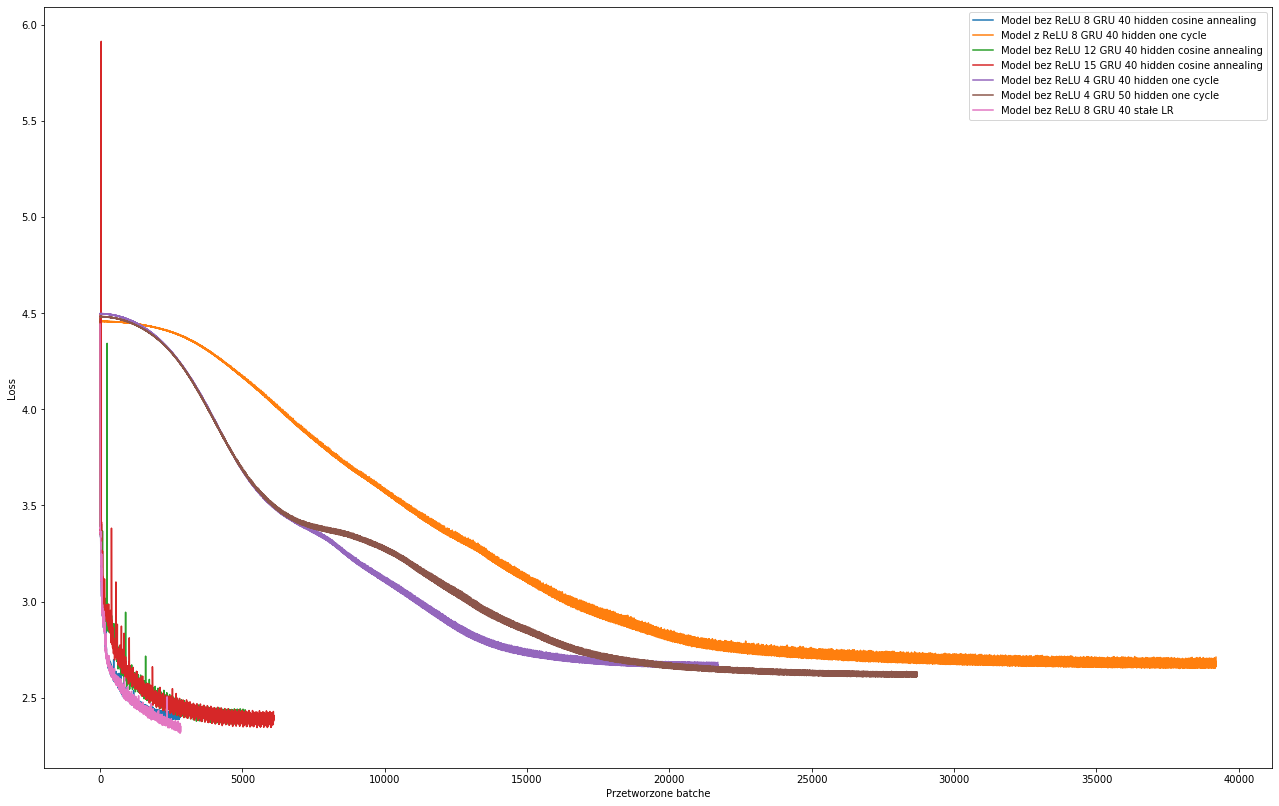

In [19]:
fix, ax = plt.subplots()
ax.plot([x for x in range(len(bez8_40_ca_242422))], bez8_40_ca_242422, "-", label="Model bez ReLU 8 GRU 40 hidden cosine annealing")
ax.plot([x for x in range(len(zre8_40_oc_271122))], zre8_40_oc_271122, "-", label="Model z ReLU 8 GRU 40 hidden one cycle")
ax.plot([x for x in range(len(bez12_40_ca_243742))], bez12_40_ca_243742, "-", label="Model bez ReLU 12 GRU 40 hidden cosine annealing")
ax.plot([x for x in range(len(bez15_40_ca_240882))], bez15_40_ca_240882, "-", label="Model bez ReLU 15 GRU 40 hidden cosine annealing")
ax.plot([x for x in range(len(bez4_40_oc_268378))], bez4_40_oc_268378, "-", label="Model bez ReLU 4 GRU 40 hidden one cycle")
ax.plot([x for x in range(len(bez4_50_oc_263464))], bez4_50_oc_263464, "-", label="Model bez ReLU 4 GRU 50 hidden one cycle")
ax.plot([x for x in range(len(bez8_40_nn_232380))], bez8_40_nn_232380, "-", label="Model bez ReLU 8 GRU 40 stałe LR")
ax.set_xlabel('Przetworzone batche')
ax.set_ylabel('Loss')
ax.legend()
fix.set_size_inches(22, 14)

fix.savefig('../wykresy/wszystkie.png')

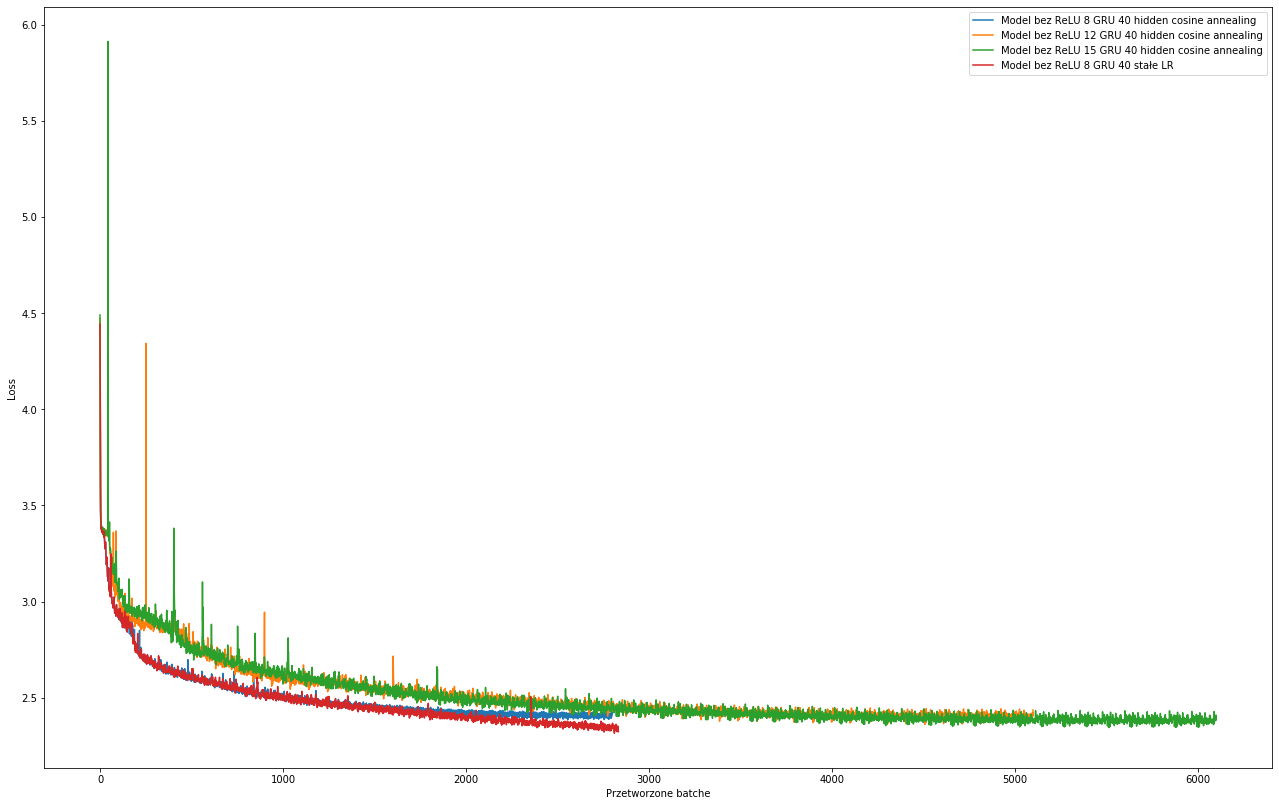

In [20]:
fix, ax = plt.subplots()
ax.plot([x for x in range(len(bez8_40_ca_242422))], bez8_40_ca_242422, "-", label="Model bez ReLU 8 GRU 40 hidden cosine annealing")
ax.plot([x for x in range(len(bez12_40_ca_243742))], bez12_40_ca_243742, "-", label="Model bez ReLU 12 GRU 40 hidden cosine annealing")
ax.plot([x for x in range(len(bez15_40_ca_240882))], bez15_40_ca_240882, "-", label="Model bez ReLU 15 GRU 40 hidden cosine annealing")
ax.plot([x for x in range(len(bez8_40_nn_232380))], bez8_40_nn_232380, "-", label="Model bez ReLU 8 GRU 40 stałe LR")
ax.set_xlabel('Przetworzone batche')
ax.set_ylabel('Loss')
ax.legend()
fix.set_size_inches(22, 14)

fix.savefig('../wykresy/srednie.png')

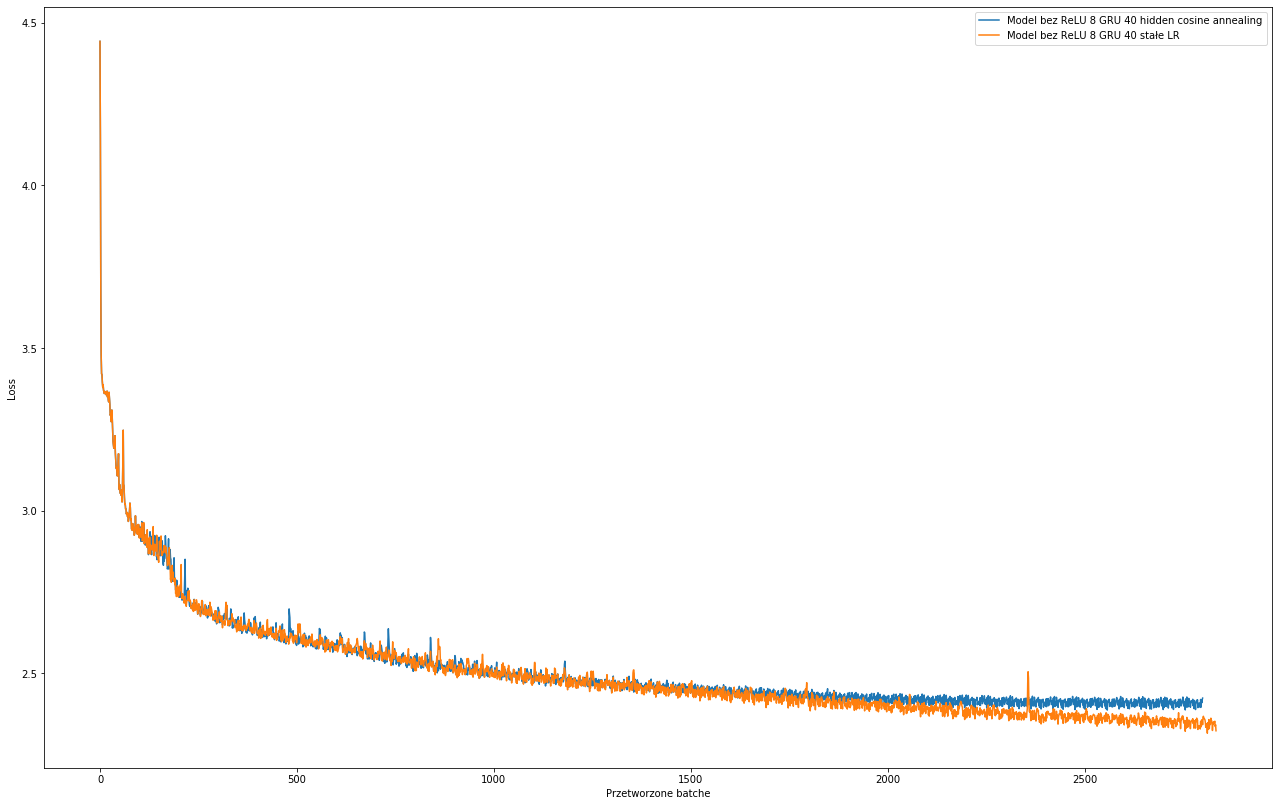

In [21]:
fix, ax = plt.subplots()
ax.plot([x for x in range(len(bez8_40_ca_242422))], bez8_40_ca_242422, "-", label="Model bez ReLU 8 GRU 40 hidden cosine annealing")
ax.plot([x for x in range(len(bez8_40_nn_232380))], bez8_40_nn_232380, "-", label="Model bez ReLU 8 GRU 40 stałe LR")
ax.set_xlabel('Przetworzone batche')
ax.set_ylabel('Loss')
ax.legend()
fix.set_size_inches(22, 14)

fix.savefig('../wykresy/ca_vs_stale.png')